<a href="https://colab.research.google.com/github/JohnCubides/ArtificialIntelligence/blob/main/Actividad-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#Importar librerias

import numpy as np #metodos numericos
import pandas as pd #Manejo datos
import matplotlib.pyplot as plt #Gráfica
import seaborn as sns #Grágica

In [48]:
#Get Data
df = pd.read_csv('https://raw.githubusercontent.com/julihdez36/Inteligencia_artificial/main/Forbes%202000%202022.csv',sep=';')

In [ ]:
# AED
df.shape

In [49]:
df.columns

Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')

In [ ]:
#Define Tittle

columnName = ['Rank', 'Name', 'Country', 'Sales', 'Profits', 'Assets', 'MarketValue', 'Unname']
df.columns = columnName
df.sample(n=6)
#df.info()

In [ ]:
#clear Data
df = df.drop('Unname', axis=1)
df.info()

In [53]:
#Change DataTyping (coerción stadistica)
df.replace(to_replace=",", value='', regex=True, inplace=True )
df.replace(to_replace="\$", value='', regex=True, inplace=True )
df.sample(5)

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
416,417,Daikin Industries,Japan,26880,1880,30450,46780
857,858,Signature Bank,United States,2480,1070,121850,14950
133,134,CNOOC,Hong Kong,37770,10910,123420,62600
1014,1015,Yango Group,China,12630,828,57930,1660
1980,1981,WT Microelectronics,Taiwan,16040,284,6270,1980


In [54]:
df.iloc[:,3:].astype(float)
df.isna().sum()

Rank           0
Name           0
Country        0
Sales          0
Profits        0
Assets         0
MarketValue    0
dtype: int64

In [ ]:
#top 10
df.head(10)

In [56]:
#Tablas Frecuencias
ni = df.Country.value_counts() #Frecuecnia absoluta

In [57]:
fi = df.Country.value_counts(normalize=True)*100 #frecuencia relativa

In [58]:
Fi = fi.cumsum()

In [63]:
table_frec = pd.DataFrame({'ni':ni,'fi': fi, 'Fi': Fi})
table_frec['Country'] = table_frec.index
table_frec

,ni,fi,Fi,Country
United States,590,29.50,29.50,United States
China,297,14.85,44.35,China
Japan,196,9.80,54.15,Japan
South Korea,65,3.25,57.40,South Korea
United Kingdom,64,3.20,60.60,United Kingdom
Canada,58,2.90,63.50,Canada
India,55,2.75,66.25,India
France,54,2.70,68.95,France
Hong Kong,54,2.70,71.65,Hong Kong
Germany,52,2.60,74.25,Germany


In [60]:
#top 10 paises
table_frec.head(10)

,ni,fi,Fi
United States,590,29.50,29.50
China,297,14.85,44.35
Japan,196,9.80,54.15
South Korea,65,3.25,57.40
United Kingdom,64,3.20,60.60
Canada,58,2.90,63.50
India,55,2.75,66.25
France,54,2.70,68.95
Hong Kong,54,2.70,71.65
Germany,52,2.60,74.25


In [61]:
#Paises con menos empresas
table_frec.tail(10)

,ni,fi,Fi
Morocco,2,0.10,99.50
Kazakhstan,2,0.10,99.60
Cayman Islands,1,0.05,99.65
Egypt,1,0.05,99.70
Argentina,1,0.05,99.75
Czech Republic,1,0.05,99.80
Bahrain,1,0.05,99.85
Uruguay,1,0.05,99.90
Peru,1,0.05,99.95
Nigeria,1,0.05,100.00


In [44]:
#Empresas en Colombia
df[ df.Country == 'Colombia' ]

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
294,295,Ecopetrol,Colombia,23430,4450,60010,36070
975,976,Bancolombia,Colombia,6080,1090,71220,10890
986,987,Grupo Aval,Colombia,10270,880,90150,4780


In [ ]:
sud = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Perú", "Uruguay", "Venezuela"]
df[df.Country.isin(sud)]

In [66]:
table_sud = table_frec[table_frec.index.isin(sud)]

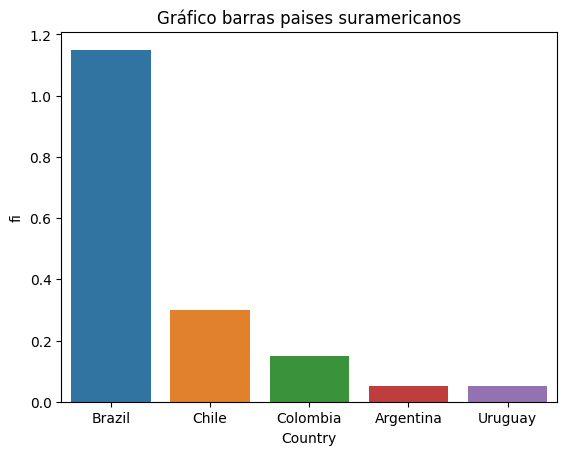

In [69]:
sns.barplot(table_sud, x='Country',y='fi')
plt.title('Gráfico barras paises suramericanos')
plt.show()

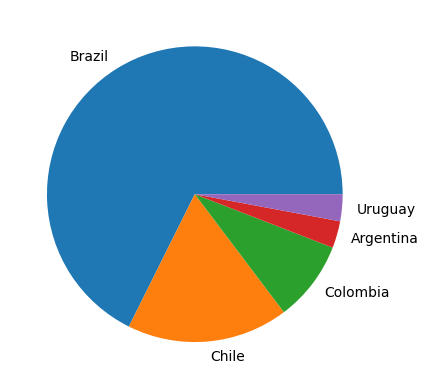

In [70]:
#Gráfico sectores
plt.pie(table_sud.fi, labels=table_sud.Country)
plt.show()

In [72]:
#Métodos numérocos
df.describe()

,Rank
count,2000.000000
mean,1000.500000
std,577.494589
min,1.000000
25%,500.750000
50%,1000.500000
75%,1500.250000
max,2000.000000
